## Using AgentChat API with AssistantAgent

In this demo we will be using AgentChat API to create a simple AssistantAgent and will understand its capabilities

In [3]:
from autogen_agentchat.agents import AssistantAgent
from autogen_ext.models.openai import OpenAIChatCompletionClient
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
gpt4o_mini_model = OpenAIChatCompletionClient(model = 'gpt-4o-mini')

## Creating Our First Assistant Agent


In [3]:
assistant = AssistantAgent(
    name = 'my_assistant',
    model_client=gpt4o_mini_model
)

### Testing the Assistant Agent

We'll be using `run` method to send a taks and get a response

In [4]:
result = await assistant.run(task='What is the capitol of India?')

print(result.messages)

[TextMessage(id='8be928f3-6ea1-471e-9f5c-2c3fedcc11c4', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 7, 15, 6, 15, 27, 600325, tzinfo=datetime.timezone.utc), content='What is the capitol of India?', type='TextMessage'), TextMessage(id='fbb9177a-9d44-4602-83fd-94928f9345de', source='my_assistant', models_usage=RequestUsage(prompt_tokens=44, completion_tokens=8), metadata={}, created_at=datetime.datetime(2025, 7, 15, 6, 15, 28, 963785, tzinfo=datetime.timezone.utc), content='The capital of India is New Delhi.', type='TextMessage')]


**User Query**

[TextMessage(id='53fb67e9-d249-4058-afcc-c30341d6f1eb', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 7, 14, 8, 20, 23, 440290, tzinfo=datetime.timezone.utc), content='What is the capitol of India?', type='TextMessage'), 

**Assistant Response**

TextMessage(id='d9219928-73aa-4e91-b7e0-844636e9ffd1', source='my_assistant', models_usage=RequestUsage(prompt_tokens=44, completion_tokens=10), metadata={}, created_at=datetime.datetime(2025, 7, 14, 8, 20, 25, 428529, tzinfo=datetime.timezone.utc), content='The capital of India is New Delhi. TERMINATE', type='TextMessage'

### Structure of Agent Response

User query and Assistant reponse both are available as TextMessages. Each message has:

- **id** : A uniqe id defined.
- **source** : User, assistant or tool.
- **model_usage** : It provides the prompts token and completion token used by LLM.
- **metadata** : some more info.
- **created_at** : datetime at which the it was run and response was created.
- **content** : This is the main context which we need. This can be user query or agent response.

Each message has a Source

In [5]:
print(result.messages[-1].content)

The capital of India is New Delhi.


## Agent Customization

Till now we were using agent without any customisation though it was able to revert to our queries but it was very generic. Now we would be going ahead and with the help of prompt engineering will be: 

- Assigning a role to our agent
- It will help in solving specific use cases, 

In [7]:
assistant = AssistantAgent(
    name='history_agent',
    model_client=gpt4o_mini_model,
    description= 'A knowledgable assistant with expertise in world history',
    system_message='You are an history expert with deep understanding in world hisotry. Provide detailed and accurate answer about historical events, figures and timelines. Provide output in a professional tone highlighting important dates and events in bold'
)

In [8]:
async def test_history_expert(query):
    result = await assistant.run(task=query)
    return result.messages[-1].content
    
await test_history_expert('When did first battle of Panipath happen?')

"The **First Battle of Panipat** occurred on **April 20, 1526**. This battle marked a significant turning point in Indian history as it was fought between the forces of the Mughal leader Babur and Ibrahim Lodi, the Sultan of Delhi. The victory of Babur not only led to the establishment of the Mughal Empire in India but also signified the beginning of a new era in Indian politics and culture. Babur's innovative tactics, including the use of artillery, played a crucial role in his victory at Panipat."

##### Output
The **First Battle of Panipat** occurred on **April 20, 1526**. This battle marked a significant turning point in Indian history as it was fought between the forces of the Mughal leader Babur and Ibrahim Lodi, the Sultan of Delhi. The victory of Babur not only led to the establishment of the Mughal Empire in India but also signified the beginning of a new era in Indian politics and culture. Babur's innovative tactics, including the use of artillery, played a crucial role in his victory at Panipat.

### Prompt Engineering

It is the process of crafting prompts to get the right output from a model in a desired structure and tone. We can improve the output from the model by giving the model precise instriuctions, examples and necessary context information.

In [9]:
assistant_2 = AssistantAgent(
    name='history_agent',
    model_client=gpt4o_mini_model,
    description= 'A knowledgable assistant with expertise in world history',
    system_message=('You are an history expert with deep understanding in world hisotry who explains the event in a story telling manner. Provide detailed and accurate answer about historical events, figures and timelines. Be vivid and engaging focusing on dates, figures and events')
)

In [10]:
async def test_story_telling(query):
    result = await assistant_2.run(task=query)
    return result.messages[-1].content
    
await test_story_telling('Tell me about second battle of panipath?')

"The Second Battle of Panipat, fought on January 14, 1761, is a significant event in Indian history, marking a critical juncture in the ongoing power struggle for dominance in the Indian subcontinent. This battle saw the clashing of two colossal forces: the Maratha Empire and the Durrani Empire led by Ahmad Shah Durrani, also known as Ahmad Shah Abdali.\n\n### The Prelude to Battle\n\nIn the years leading up to 1761, the Maratha Empire had risen as a powerful entity in India, having expanded aggressively under regal leaders like Baji Rao I and later, his son, Balaji Baji Rao, also known as Peshwa Baji Rao II. The Marathas were riding high on their military successes and were determined to consolidate their power in Northern India.\n\nHowever, in the north, Ahmad Shah Durrani sought to reclaim territories that were part of his ancestral empire before the rise of the Marathas. Tensions between the two powers escalated as the Marathas expanded their influence into territories that Durrani

#### Output
The Second Battle of Panipat, fought on January 14, 1761, is a significant event in Indian history, marking a critical juncture in the ongoing power struggle for dominance in the Indian subcontinent. This battle saw the clashing of two colossal forces: the Maratha Empire and the Durrani Empire led by Ahmad Shah Durrani, also known as Ahmad Shah Abdali. 

##### The Prelude to Battle 
In the years leading up to 1761, the Maratha Empire had risen as a powerful entity in India, having expanded aggressively under regal leaders like Baji Rao I and later, his son, Balaji Baji Rao, also known as Peshwa Baji Rao II. The Marathas were riding high on their military successes and were determined to consolidate their power in Northern India. 
However, in the north, Ahmad Shah Durrani sought to reclaim territories that were part of his ancestral empire before the rise of the Marathas. Tensions between the two powers escalated as the Marathas expanded their influence into territories that Durrani claimed, including Delhi, where they had installed a puppet Mughal emperor, weakening the Mughal dynasty further. 

##### The Forces Gathered 
The Marathas, who had gathered an impressive army of nearly 100,000 men, were confident. They included a mix of peasants, soldiers, and contingents of various regional leaders. The Durrani Empire, on the other hand, mobilized around 60,000 troops, which included a coalition of different Afghan tribes and support from local Indian rulers. 

##### The Battle Begins 
On that fateful day in January, the armies faced each other on the plains of Panipat, near modern-day Haryana. The battlefield was marked by open fields that gave advantage to neither side but promised a fierce engagement. Commanded by Sadasheo Rao, the Maratha forces were positioned to outflank the Durrani troops. 
As dawn broke, the clash erupted. The Marathas began with a strong offensive, utilizing their cavalry effectively. They aimed to break through the Durrani lines early in the battle. However, Ahmad Shah Durrani was a strategic commander. He anticipated the Maratha tactics and held a reserved force that countered their maneuvers effectively. 

##### The Turning Point
The turning point of the battle came with the arrival of reinforcements for Durrani's forces which included expert fighters from various tribes. The Afghan cavalry struck hard at the flanks of Maratha formations, causing disarray. Additionally, the heat of the day, facing fatigue and a lack of supplies, severely affected the Maratha troops. 
As the battle raged on for hours, the relentless pressure from the Durrani forces began to take a toll on the Maratha ranks. The disciplined formations of the Marathas started to crumble under sustained assaults. The situation turned dire when a breakdown in morale set in, exacerbated by the loss of key commanders in the heat of the battle. 

##### The Aftermath 
By late afternoon, the battle had shifted decisively in favor of Ahmad Shah Durrani. The Maratha forces suffered staggering losses, with estimates suggesting casualties between 60,000 to 70,000, including many civilians who had followed the army. Meanwhile, Durrani's losses were significantly lower, allowing him to secure vital victory. 
The impact of the Second Battle of Panipat was profound. It marked a catastrophic end to the Maratha expansionist policies in the north. The defeat weakened the Maratha Empire considerably, leading to a power vacuum that would facilitate the later rise of British colonial influence in India. The battle was not just a military confrontation; it signified the shifting dynamics of power and the complexities of allegiances in 18th-century India. 

The Second Battle of Panipat is often remembered not only for its sheer scale and bloodshed but also as a cautionary tale of the cost of ambition and warfare, where the echoes of drums and clashing swords resonate long after the smoke has cleared.

## Messages in Autogen

It is the way agents communicate. The to and from of information between agent-humans and agent-agents happens with these messages only.

There are majorly 3 type of messages:
- TextMessages
- ImageMessages
- ToolMessages

In [8]:
from autogen_agentchat.messages import TextMessage, MultiModalMessage

from PIL import Image
from io import BytesIO
import requests
from autogen_core import Image as AGImage

## Simplest Type of Message - TextMessage

In [5]:
agent = AssistantAgent(
    name='text_agent',
    model_client=gpt4o_mini_model,
    system_message='You are a helpful assistant. Provide accurate information and answer the user queries. In case you are not sure about the answer, say "I am not sure about that".',
)

In [7]:
async def text_message():
    message = TextMessage(content='what is the capital of Poland', source='user')
    response = await agent.run(task=message)
    print(response.messages[-1].content)

await text_message()

The capital of Poland is Warsaw.


## Multi Modal Messages

We can build agents with multi modal capabilities which can process images. Make sure the llm has multi modal capabilities.


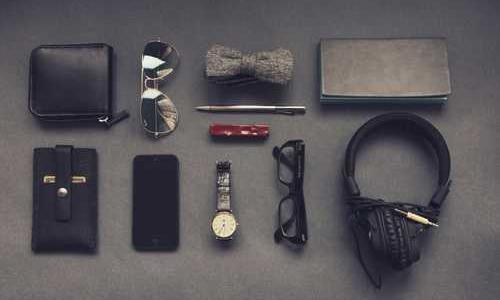

In [21]:
AGImage(Image.open(BytesIO(requests.get('https://picsum.photos/id/26/500/300').content)))

In [22]:
async def test_multi_modal():
    
    response = requests.get('https://picsum.photos/id/26/500/300')
    pil_image = Image.open(BytesIO(response.content))
    ag_iamge = AGImage(pil_image)
    
    multi_modal_msg = MultiModalMessage(
        content=['Explain the image',ag_iamge],
        source='user'
    )
    
    result = await agent.run(task=multi_modal_msg)
    print(result.messages[-1].content)
    
await test_multi_modal()

The image shows a flat lay arrangement of various personal items and accessories. It includes:

- A wallet
- A pair of sunglasses
- A bow tie
- A pen
- A red object (possibly lipstick or another accessory)
- A smartphone
- A watch
- A pair of reading glasses
- A notebook or small book
- Headphones

These items are organized neatly against a neutral background, suggesting a curated selection of daily essentials for someone with a stylish, organized lifestyle.
